In [274]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import *
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures

## Exploratory data analysis

In [275]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [276]:
# load train and test data
train = pd.read_csv('train_BRCpofr.csv')
test  = pd.read_csv("test_koRSKBP.csv")

#train = trains.drop(columns=['id'])
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [277]:
# explanatory data analysis

In [278]:
train.shape

(89392, 12)

In [279]:
test.shape

(59595, 11)

In [280]:
train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [281]:
train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [282]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [283]:
for col in train.columns:
    if(train[col].dtype=='object'):
        print(train[col].value_counts(), end='\n\n**********************************\n')

Male      50497
Female    38895
Name: gender, dtype: int64

**********************************
Urban    62455
Rural    26937
Name: area, dtype: int64

**********************************
High School    46247
Bachelor       39399
Others          3746
Name: qualification, dtype: int64

**********************************
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
Name: income, dtype: int64

**********************************
More than 1    60263
1              29129
Name: num_policies, dtype: int64

**********************************
A    56644
B    24635
C     8113
Name: policy, dtype: int64

**********************************
Platinum    47796
Silver      21010
Gold        20586
Name: type_of_policy, dtype: int64

**********************************


C:\Users\sintu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='claim_amount'>

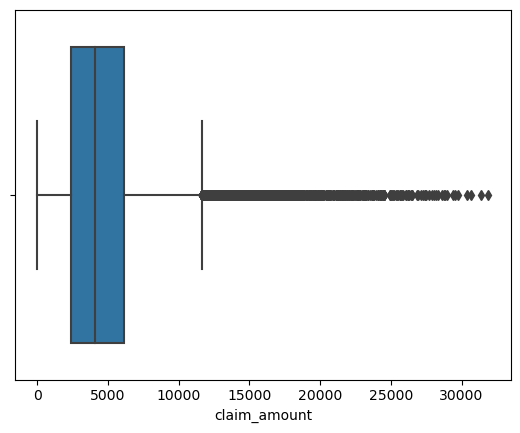

In [284]:
sns.boxplot('claim_amount', data=train)

C:\Users\sintu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


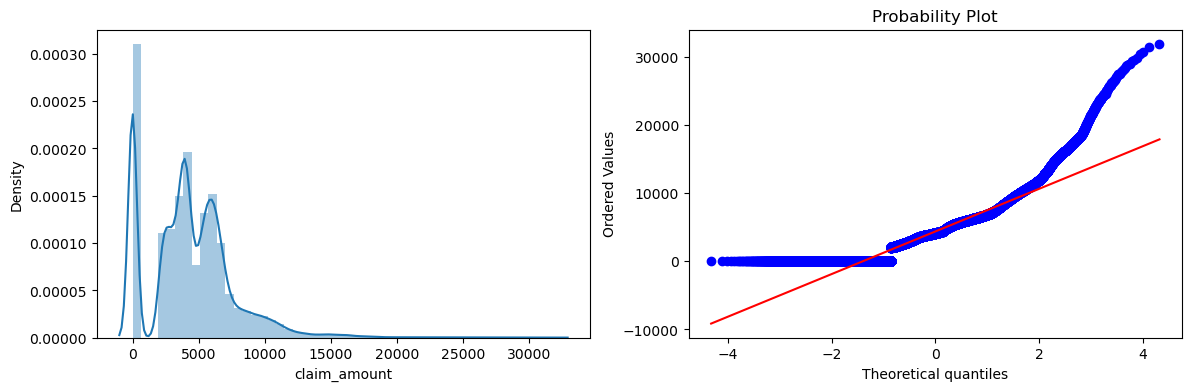

In [285]:
# Plotting the distplots without any transformation

#for col in train['claim_amount'].columns:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train['claim_amount'])
#plt.title(col)

plt.subplot(122)
stats.probplot(train['claim_amount'], dist="norm", plot=plt)
#plt.title(col)

plt.show()

In [286]:
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(train[['claim_amount', 'cltv']])
X_train_transformed = pd.DataFrame(X_train_transformed, columns = ['claim_amount', 'cltv'])

pd.DataFrame({'cols':'claim_amount','box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,claim_amount,0.417988
1,claim_amount,-0.526412


C:\Users\sintu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


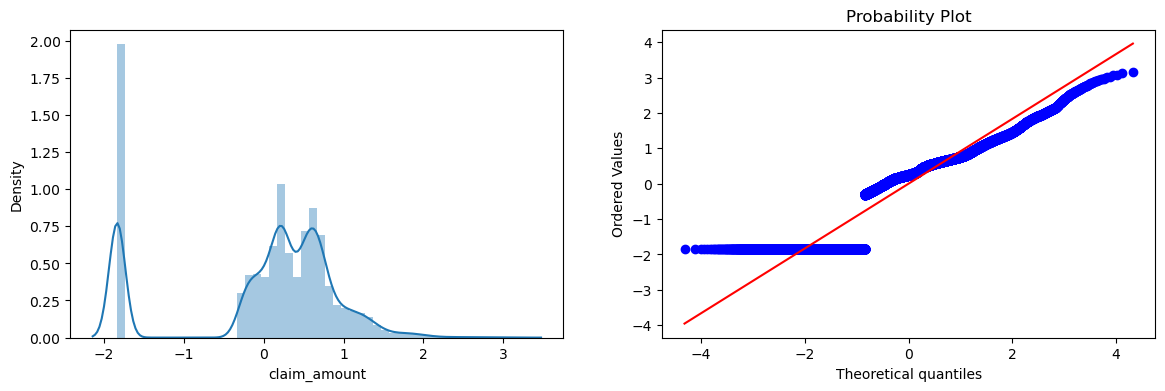

In [287]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train_transformed['claim_amount'])
#plt.title(col)

plt.subplot(122)
stats.probplot(X_train_transformed['claim_amount'], dist="norm", plot=plt)
#plt.title(col)

plt.show()

C:\Users\sintu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


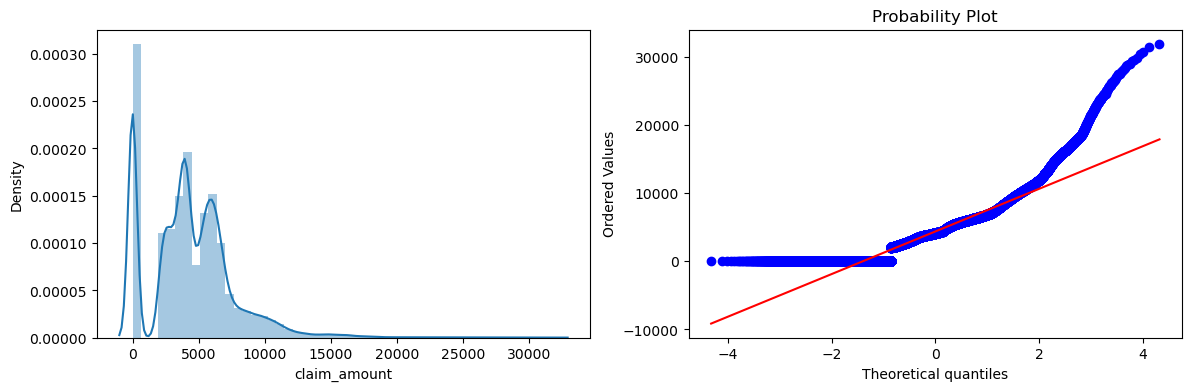

In [288]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(train['claim_amount'])
#plt.title(col)

plt.subplot(122)
stats.probplot(train['claim_amount'], dist="norm", plot=plt)
#plt.title(col)

plt.show()

In [289]:
# kbin_claim = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

# X_train_trf = kbin_claim.fit_transform(pd.DataFrame(X_train_transformed['claim_amount']))
# X_train_transformed['claim_amt_scaled'] = X_train_trf

# plt.figure(figsize=(14,4))
# plt.subplot(121)
# sns.distplot(X_train_transformed['claim_amt_scaled'])
# #plt.title(col)

# plt.subplot(122)
# stats.probplot(X_train_transformed['claim_amt_scaled'], dist="norm", plot=plt)
# #plt.title(col)

# plt.show()

# sns.displot(X_train_transformed['claim_amt_scaled'])

In [290]:
train.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

In [291]:
train['gender'] = train['gender'].astype("category")
train['area'] = train['area'].astype("category")
train['qualification'] = train['qualification'].astype("category")
train['marital_status'] = train['marital_status'].astype("category")
train['vintage'] = train['vintage'].astype("category")
train['num_policies'] = train['num_policies'].astype("category")
train['policy'] = train['policy'].astype("category")
train['type_of_policy'] = train['type_of_policy'].astype("category")

In [292]:
train.dtypes

id                   int64
gender            category
area              category
qualification     category
income              object
marital_status    category
vintage           category
claim_amount         int64
num_policies      category
policy            category
type_of_policy    category
cltv                 int64
dtype: object

In [293]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(train.drop(columns=['cltv']),
                                                 train['cltv'],
                                                 test_size=0.2)

In [294]:
X_train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
88350,88351,Female,Urban,Bachelor,5L-10L,0,2,6199,More than 1,A,Platinum
46942,46943,Female,Urban,Bachelor,5L-10L,1,5,2322,1,A,Platinum
30355,30356,Male,Urban,High School,5L-10L,1,7,6374,1,A,Platinum
37137,37138,Female,Rural,Bachelor,5L-10L,0,0,0,More than 1,C,Gold
227,228,Male,Rural,High School,5L-10L,0,7,0,More than 1,C,Gold
...,...,...,...,...,...,...,...,...,...,...,...
56477,56478,Female,Urban,Bachelor,5L-10L,1,8,2981,More than 1,A,Gold
11861,11862,Male,Urban,High School,5L-10L,1,3,3780,More than 1,A,Gold
28439,28440,Male,Urban,High School,5L-10L,1,4,5775,More than 1,A,Platinum
55460,55461,Male,Urban,High School,5L-10L,1,1,8317,More than 1,A,Platinum


In [295]:
train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [296]:
two = ['Others', 'High School', 'Bachelor']
three = ['<=2L', '2L-5L', '5L-10L', 'More than 10L']
four = [0, 1]
five = [0, 1, 2, 3, 4, 5, 6, 7, 8]
seven = ['1', 'More than 1']
eight = ['C', 'B', 'A']
nine = ['Silver', 'Gold', 'Platinum']

## Building Model pipeline

In [297]:
# building the pipeline
# Usinh OHE for nominal and ordinal encoding for ordinal data.
trf2 = ColumnTransformer([
    ('powerT', PowerTransformer(), [6])
], remainder='passthrough')


trf1 = ColumnTransformer([
    ('ohe',OneHotEncoder(handle_unknown='ignore', drop='first'),[1, 2]),
    ('oe1',OrdinalEncoder(categories=[two, three, four, five, seven, eight, nine]),[3,4,5,6,7,8,9])
],
    remainder='passthrough'
)


# Scaling
# trf3 = ColumnTransformer([
#     ('scale',MinMaxScaler(),slice(0,10))
# ])




# train the model
#trf4 = DecisionTreeClassifier()
trf4 = RandomForestRegressor(n_estimators=500, max_depth=7)
#trf4 = LinearRegression()
#trf4 = Ridge(alpha=0.01)
#trf4 = Lasso(alpha=0.1)


pipe = Pipeline([
    ('trf2',trf2),
    ('trf1',trf1),
    
    #('trf3',trf3),
    ('trf4',trf4)
])

In [298]:
# # Hyperparameter tuning using gridsearchcv
# params = {
#     'trf5__alpha':[0.001, 0.1, 0.3, 0.6, 0.8, 1, 2, 5, 10, 50, 100]
# }


# grid = GridSearchCV(pipe, params, cv=5, scoring='r2')
# grid.fit(X_train.iloc[:, 1:], y_train)

## Training Model on train data and Metrics evaluation

In [299]:
# model training on train data

pipe.fit(train.drop(columns=['id', 'cltv']), train['cltv'])

Pipeline(steps=[('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('powerT', PowerTransformer(),
                                                  [6])])),
                ('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [1, 2]),
                                                 ('oe1',
                                                  OrdinalEncoder(categories=[['Others',
                                                                              'High '
                                                                              'School',
                                                                              'Bachelor'],
                                                                             ['<=2L',
                                                                              '2L-5L',
                                                                              '5L-10L',
                                                                              'More '
                                                                              'than '
                                                                              '10L'],
                                                                             [0,
                                                                              1],
                                                                             [0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             ['1',
                                                                              'More '
                                                                              'than '
                                                                              '1'],
                                                                             ['C',
                                                                              'B',
                                                                              'A'],
                                                                             ['Silver',
                                                                              'Gold',
                                                                              'Platinum']]),
                                                  [3, 4, 5, 6, 7, 8, 9])])),
                ('trf4', RandomForestRegressor(max_depth=7, n_estimators=500))])

In [246]:
cross_val_score(pipe, train.iloc[:, 1:-1], train['cltv'], cv=5, scoring='r2').mean()

0.15833211626410532

In [245]:
# r2 score of the model

ypred = pipe.predict(X_test)
r2_score(y_test, ypred)

0.17214292248058416

In [228]:
preds = np.floor(pipe.predict(X_test.iloc[:,1:])).astype("int64")
r2_score(y_test, preds)

array([122708, 101724, 156257, ...,  86179,  94865,  50221], dtype=int64)

In [248]:
# plt.hist(y_test)

In [249]:
# plt.hist(ypred)

## Test prediction and saving It in test_predictions.csv

In [250]:
# prediction of test data

preds = pipe.predict(test.iloc[:,1:])

In [251]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['cltv'] = preds
submission.to_csv('test_predictions.csv', index=False)

In [252]:
# pd.read_csv('test_predictions.csv')